In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import pickle

In [117]:
data = pd.read_csv('./archive/CO2 Emissions_Canada.csv')
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

We can see there aren't any null values in our dataset. let's check!

In [119]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

now let's rename our columns for easier manipulation

In [120]:
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
data.rename(renamed_columns, axis='columns', inplace=True)

In [121]:
data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [122]:
import plotly.graph_objs as go

for column in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    data_column = data[column].value_counts().reset_index().rename(columns={'index': column, column: 'Count'})[0:30]
    data_column = data_column.sort_values(by='Count', ascending=False)

    fig = go.Figure(go.Bar(x=data_column[column], y=data_column['Count'], 
                           marker={'color': data_column['Count']}, 
                           text=data_column['Count'], textposition="outside"))
    fig.update_layout(title_text=f'Top 30 {column}', xaxis_title=column, yaxis_title='Number of Vehicles', 
                      title_x=0.5, width=700, height=500)
    fig.show()

now, let's check our dataset's statistics

In [123]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


<Axes: >

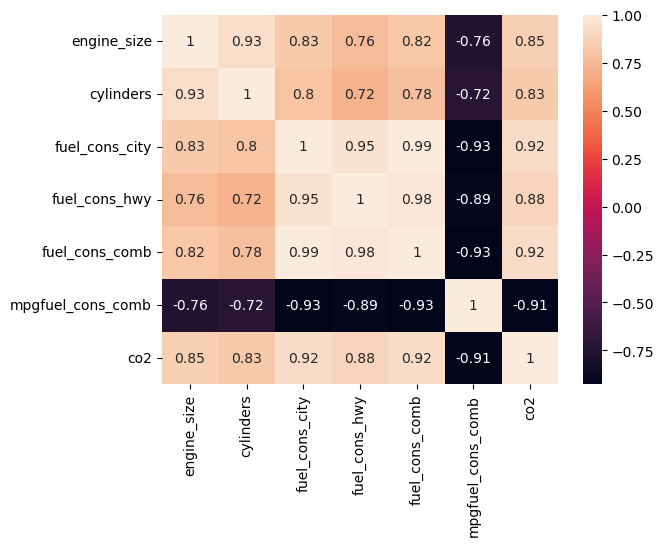

In [124]:
data.corr()
sns.heatmap(data.corr(), annot = True)

In [125]:
data = data.drop(['engine_size', 'cylinders','transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'mpgfuel_cons_comb'], axis = 1)

In [126]:
data.columns

Index(['make', 'model', 'vehicle_class', 'co2'], dtype='object')

In [127]:
data

,make,model,vehicle_class,co2
0,ACURA,ILX,COMPACT,196
1,ACURA,ILX,COMPACT,221
2,ACURA,ILX HYBRID,COMPACT,136
3,ACURA,MDX 4WD,SUV - SMALL,255
4,ACURA,RDX AWD,SUV - SMALL,244
...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,232


In [138]:
for car in data['make']:
    print(car)

ACURA
ACURA
ACURA
ACURA
ACURA
ACURA
ACURA
ACURA
ACURA
ACURA
ACURA
ACURA
ALFA ROMEO
ASTON MARTIN
ASTON MARTIN
ASTON MARTIN
ASTON MARTIN
ASTON MARTIN
ASTON MARTIN
ASTON MARTIN
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
AUDI
BENTLEY
BENTLEY
BENTLEY
BENTLEY
BENTLEY
BENTLEY
BENTLEY
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BMW
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
BUICK
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CADILLAC
CA

In [139]:
car_variable = ''
all_cars = {}
counter = 0

for car_make, car_model in zip(data['make'], data['model']):
    if car_variable != car_make + ' ' + car_model:
        all_cars[car_variable] = counter

        car_variable = car_make + ' ' + car_model

        counter = 0
    else:
        counter += 1
    


In [140]:
all_cars

{'': 0,
 'ACURA ILX': 0,
 'ACURA ILX HYBRID': 0,
 'ACURA MDX 4WD': 0,
 'ACURA RDX AWD': 0,
 'ACURA RLX': 0,
 'ACURA TL': 0,
 'ACURA TL AWD': 1,
 'ACURA TSX': 2,
 'ALFA ROMEO 4C': 0,
 'ASTON MARTIN DB9': 0,
 'ASTON MARTIN RAPIDE': 0,
 'ASTON MARTIN V8 VANTAGE': 1,
 'ASTON MARTIN V8 VANTAGE S': 1,
 'ASTON MARTIN VANQUISH': 0,
 'AUDI A4': 0,
 'AUDI A4 QUATTRO': 1,
 'AUDI A5 CABRIOLET QUATTRO': 0,
 'AUDI A5 QUATTRO': 1,
 'AUDI A6 QUATTRO': 1,
 'AUDI A6 QUATTRO TDI (modified)': 0,
 'AUDI A7 QUATTRO': 0,
 'AUDI A7 QUATTRO TDI (modified)': 0,
 'AUDI A8': 1,
 'AUDI A8 TDI (modified)': 0,
 'AUDI A8L': 1,
 'AUDI A8L TDI (modified)': 0,
 'AUDI ALLROAD QUATTRO': 0,
 'AUDI Q5': 0,
 'AUDI Q5 TDI (modified)': 0,
 'AUDI Q5 HYBRID': 0,
 'AUDI Q7': 0,
 'AUDI Q7 TDI (modified)': 0,
 'AUDI R8': 0,
 'AUDI R8 SPYDER': 0,
 'AUDI RS 5': 0,
 'AUDI RS 5 CABRIOLET': 0,
 'AUDI RS 7': 0,
 'AUDI S4': 0,
 'AUDI S5': 0,
 'AUDI S5 CABRIOLET': 0,
 'AUDI S6': 0,
 'AUDI S7': 0,
 'AUDI S8': 0,
 'AUDI SQ5': 0,
 'AUDI TT CO

In [141]:
categorical_columns = ['make', 'model', 'vehicle_class']
label_encoders = {}
for col in categorical_columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    label_encoders[col] = label_encoder
    
data

,make,model,vehicle_class,co2
0,0,1057,0,196
1,0,1057,0,221
2,0,1058,0,136
3,0,1233,11,255
4,0,1499,11,244
...,...,...,...,...
7380,41,1951,11,219
7381,41,1957,11,232
7382,41,1960,11,240
7383,41,1968,12,232


In [142]:
X = data[['make','model', 'vehicle_class']]
y = data["co2"]

In [144]:
X

,make,model,vehicle_class
0,0,1057,0
1,0,1057,0
2,0,1058,0
3,0,1233,11
4,0,1499,11
...,...,...,...
7380,41,1951,11
7381,41,1957,11
7382,41,1960,11
7383,41,1968,12


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [39]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_train_pred = rfr.predict(X_train)

In [102]:
with open('filename.pkl', 'wb') as f:
    pickle.dump(rfr, f)

In [103]:
with open('filename.pkl', 'rb') as f:
    model = pickle.load(f)

In [30]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

rfr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'rfr')
rfr_score

,rfr_train,rfr_test
R2,0.955107,0.897669
mae,8.556339,12.494325
mse,154.540745,341.957469
rmse,12.431442,18.492092


In [96]:
d = {'make': [13, 15], 'model': [1769, 1631], 'vehicle_class': [1, 15]}

dataframe = pd.DataFrame(data=d)

In [107]:
rfr.predict(dataframe)[0]

266.07421114996106

In [98]:
y_train_pred[4]

206.51070634920637